In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
# from keras.layers.core import Dense

from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

from keras.datasets import mnist
from keras.utils import np_utils, to_categorical

Using TensorFlow backend.


In [3]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [4]:
devanagari = np.load("data/devanagari.npz")

In [5]:
(X_train, y_train) = devanagari['X_train'], devanagari['y_train']
(X_test, y_test) = devanagari['X_test'], devanagari['y_test']
num_classes = 46
print X_train.shape, y_train.shape

(78200, 32, 32) (78200,)


In [6]:
X_test[0].shape

(32, 32)

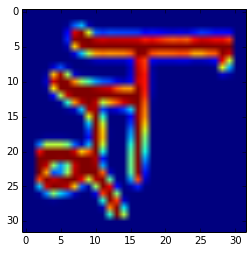

In [7]:
plt.imshow(X_test[0].reshape(32, 32))

In [8]:
print X_train.shape, y_train.shape

(78200, 32, 32) (78200,)


In [9]:
num_pixels = X_train.shape[1] * X_train.shape[2]
# X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
# X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

In [10]:
# normalize inputs from 0-255 to 0-1
# Put everything on grayscale
X_train = X_train / 255
X_test = X_test / 255

In [11]:
y_train_string = ",".join(y_train)
y_test_string = ",".join(y_test)

In [12]:
# one hot encode outputs
from keras.preprocessing import text
y_train = np.array(text.one_hot(y_train_string, num_classes, filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n',
                                 lower=True, split=","))
y_test = np.array(text.one_hot(y_test_string, num_classes, filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n',
                                 lower=True, split=","))

In [13]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [14]:
X_train.shape

(78200, 32, 32, 1)

In [15]:
y_train.shape

(78200, 46)

In [16]:
# model = Sequential()
# model.add(Dense(512, activation='relu', input_shape=(1024,)))
# model.add(Dense(512, activation='relu'))
# model.add(Dense(46, activation='softmax'))

# model.compile(loss='categorical_crossentropy', optimizer='adam', 
#               metrics=['accuracy'])
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(32, 32, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

In [ ]:
network_history = model.fit(X_train, y_train, epochs=5, batch_size=200, verbose=2)

Epoch 1/5
 - 138s - loss: 0.9770 - acc: 0.7168
Epoch 2/5


In [295]:
# Evaluate model on test data
scores = model.evaluate(X_test, y_test, verbose=0)
print scores
print("Error: %.2f%%" % (100-scores[1]*100))

[0.24202963207726894, 0.93398550724637686]
Error: 6.60%
